# グラフ・ネットワーク分析の勉強
- めも
    - クラスタリングは何らかの主観や視点に基づいて分類されている。
    - クラスタリングの結果は分類目的に常に応じて検証する必要がある。

In [2]:
import numpy as np
import pandas as pd

import itertools

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

## 1. グラフの可視化

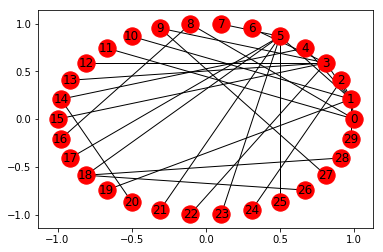

In [2]:
# これでも、ランダムなネットワークを生成できる。
G = nx.barabasi_albert_graph(30, 1)
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos)

In [3]:
data = (np.random.rand(8, 8) > 0.7).astype(int)
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7
0,0,0,1,0,0,1,0,0
1,1,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0
3,0,0,0,1,1,1,0,1
4,1,1,1,0,1,1,0,0
5,0,0,0,1,0,1,0,1
6,0,0,0,1,0,0,1,0
7,1,1,0,0,0,0,0,1


- 無向グラフ：　nx.Graph()
- 有効グラフ：　nx.DiGraph()

In [4]:
G = nx.DiGraph()

for key, val in df.to_dict().items():
    for _key, _val in val.items():
        if _val == 1:
            G.add_edge(key, _key)

In [5]:
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7))

In [6]:
G.edges()

OutEdgeView([(0, 1), (0, 4), (0, 7), (1, 2), (1, 4), (1, 7), (2, 0), (2, 4), (3, 3), (3, 5), (3, 6), (4, 3), (4, 4), (5, 0), (5, 3), (5, 4), (5, 5), (6, 6), (7, 1), (7, 3), (7, 5), (7, 7)])

[いろんな形に描画できる](https://networkx.github.io/documentation/stable/reference/drawing.html)

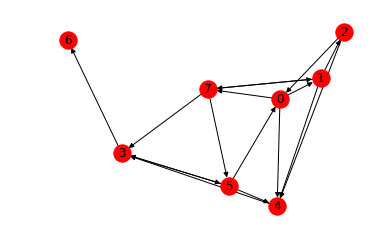

In [7]:
plt.figure(figsize=(6,4))
pos = nx.spring_layout(G) # グラフにラベルつける。
nx.draw_networkx(G, pos)
plt.axis("off")
plt.show()

## 2. 最短経路長とか
- 最短経路長の算出法としてよく用いられるのが、ダイクストラ法

In [8]:
G = nx.barabasi_albert_graph(30, 2, 1)

In [9]:
nx.dijkstra_path(G, 1, 5), nx.dijkstra_path_length(G, 1, 5)

([1, 3, 5], 2)

In [10]:
s = [str(i) for i in range(1, 8)]
combi_cand = list(itertools.permutations(s, 2))

In [11]:
edge_labels = {}

for c in combi_cand:
    try:
        # ここが最短経路を算出するところ。（ダイクストラ法）
        edge_labels[(int(c[0]), int(c[1]))] = nx.dijkstra_path_length( G, int(c[0]), int(c[1]) )
    except:
        pass

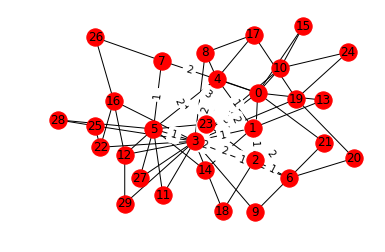

In [15]:
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G, k=0.3)
nx.draw_networkx(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.axis("off")
plt.show()

In [16]:
'''おまけ：最短経路の平均を計算するメソッド'''
nx.average_shortest_path_length(G)

2.331034482758621

## 3. 中心性のはなし
- **中心性**とは、ネットワーク上のノードの中で「どのノードが中心なのか」を表す値のこと。
- 中心性にはいくつかあり、３つ例にあげると、
    - 次数中心性  
    - 近接中心性  
    - 媒介中心性（これがよく使われる）  
    - 固有ベクトル中心性  
    - PageRank  
    
他にもいろいろ、中心性がある。知りたいことによって、使い分けが必要そう。

In [17]:
data_path = './data/relation_data/lesmis.gml'
G = nx.read_gml(data_path)
# nx.to_numpy_array(G) # っていうのもある。

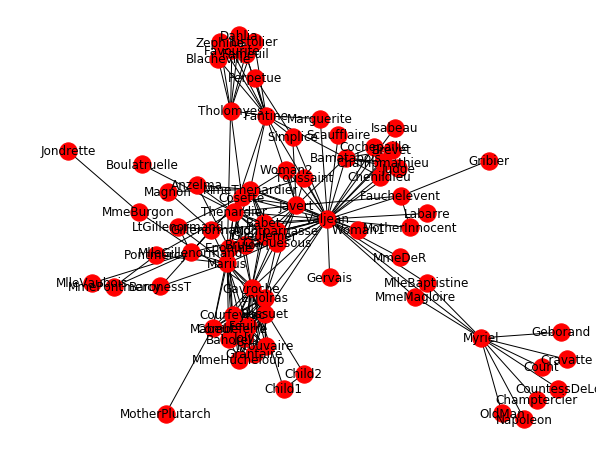

In [18]:
plt.figure(figsize=(10, 8))
nx.draw_networkx(G, with_labels=True)
plt.axis("off")
plt.show()

### 次数中心性
ノード$i$ の中心性 = ノード$i$ に繋がっているエッジ数
- より多くのノードと関係を持つノードを高く評価する考え方。

In [19]:
degree_centers = nx.degree_centrality(G)
sorted(degree_centers.items(), key=lambda x: x[1], reverse=True)[:5]

[('Valjean', 0.47368421052631576),
 ('Gavroche', 0.2894736842105263),
 ('Marius', 0.25),
 ('Javert', 0.22368421052631576),
 ('Thenardier', 0.21052631578947367)]

### 近接中心性
ノード$i$ の中心性 = (ノードの数 - 1) / (他のノードとノード$i$ の距離の総和)
- 全てのノードから距離が近いほど、高く評価する考え方。

In [20]:
close_centers = nx.closeness_centrality(G)
sorted(close_centers.items(), key=lambda x: x[1], reverse=True)[:5]

[('Valjean', 0.6440677966101694),
 ('Marius', 0.5314685314685315),
 ('Javert', 0.5170068027210885),
 ('Thenardier', 0.5170068027210885),
 ('Gavroche', 0.5135135135135135)]

### 媒体中心性
ノード$i$ の中心性 = ノード$i$ を通る経路数の総和 / ノード$i$ を除く点の組み合わせ数
- あるクラスターとあるクラスターを橋渡しするものが高くなる傾向がある

In [21]:
between_centers = nx.betweenness_centrality(G)
sorted(between_centers.items(), key=lambda x: x[1], reverse=True)[:5]

[('Valjean', 0.5699890527836186),
 ('Myriel', 0.17684210526315788),
 ('Gavroche', 0.16511250242584757),
 ('Marius', 0.13203248862194605),
 ('Fantine', 0.1296445409881942)]

### 固有ベクトル中心性
ノード$i$ の固有ベクトル中心性 = ノード$i$ に対してエッジを張っているノードの中心性の合計
- 自分に対してエッジを張っているノードがどれだけの中心性を持っているかということを考慮する。  

In [22]:
eigen_centers = nx.eigenvector_centrality_numpy(G)
sorted(eigen_centers.items(), key=lambda x: x[1], reverse=True)[:5]

[('Gavroche', 0.31784126035221111),
 ('Valjean', 0.26760657924244036),
 ('Enjolras', 0.26718344911122416),
 ('Marius', 0.2591130576727193),
 ('Bossuet', 0.24213715106699701)]

### PageRank
仕組みは調べないとよくわからない。

In [23]:
pagerank_centers = nx.pagerank(G)
sorted(pagerank_centers.items(), key=lambda x: x[1], reverse=True)[:5]

[('Valjean', 0.07543374445332471),
 ('Myriel', 0.042803439760757324),
 ('Gavroche', 0.03576412343161935),
 ('Marius', 0.030892701920406464),
 ('Javert', 0.030302597127170365)]

PageRankを用いて、ノードの大きさを変えてみる。

In [28]:
G.add_nodes_from([(tag, {"pagerank":pagerank}) for tag,pagerank in pagerank_centers.items()])
# PageRankによってノードの大きさを変化
node_size = [ int(d["pagerank"]*20000) for (n,d) in G.nodes(data=True)]
# ノードの値によってエッジの太さを変化
edge_size = [ d['value'] for (u,v,d) in G.edges(data=True)]

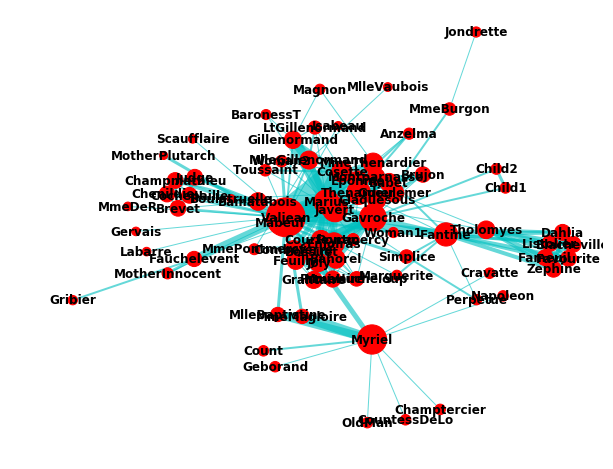

In [30]:
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.3)
nx.draw_networkx_nodes(G, pos, node_size=node_size)
nx.draw_networkx_labels(G, pos, fontsize=14, font_weight="bold")
nx.draw_networkx_edges(G, pos, alpha=0.6, edge_color='C', width=edge_size)
plt.axis("off")
plt.show()

次はエッジの太さを変えられるのか。

## 4. コミュニティ検出
レ・ミゼラブルのコミュニティ検出をする

In [3]:
data_path = './data/relation_data/lesmis.gml'
G = nx.read_gml(data_path)

In [4]:
cliques = nx.node_clique_number(G)

In [5]:
temp = {'2': [], '3': [], '4':[], '5':[], '7':[], '8':[], '10':[]}
for k, v in cliques.items():
    temp[str(v)].append(k)

In [6]:
# クラスターごとに色分け
for k in temp.keys():
    color = np.random.rand(3)
    for t in temp[k]:
        G.node[t]['color'] = color

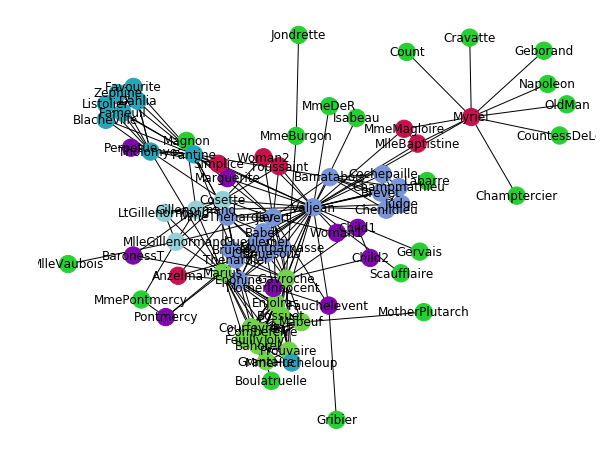

In [7]:
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.3)
nx.draw_networkx(G, pos, node_color=[G.node[n].get('color', 'red') for n in G.nodes()])
plt.axis("off")
plt.show()

In [8]:
import networkx as nx
from networkx.algorithms import community
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
dst = sorted(map(sorted, next_level_communities))

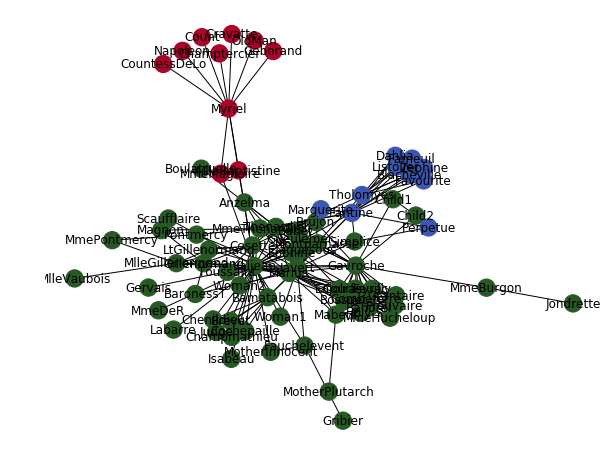

In [35]:
# クラスターごとに色分け
for k in dst:
    color = np.random.rand(3)
    for t in k:
        G.node[t]['color'] = color

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.1)
nx.draw_networkx(G, pos, node_color=[G.node[n].get('color', 'red') for n in G.nodes()])
plt.axis("off")
plt.show()

In [39]:
list(community.k_clique_communities(G, 5))

[frozenset({'Bahorel',
            'Bossuet',
            'Combeferre',
            'Courfeyrac',
            'Enjolras',
            'Feuilly',
            'Gavroche',
            'Grantaire',
            'Joly',
            'Mabeuf',
            'Marius',
            'MmeHucheloup',
            'Prouvaire',
            'Valjean'}),
 frozenset({'Cosette',
            'Gillenormand',
            'LtGillenormand',
            'Marius',
            'MlleGillenormand',
            'Valjean'}),
 frozenset({'Blacheville',
            'Dahlia',
            'Fameuil',
            'Fantine',
            'Favourite',
            'Listolier',
            'Tholomyes',
            'Zephine'}),
 frozenset({'Babet',
            'Brujon',
            'Claquesous',
            'Cosette',
            'Eponine',
            'Fantine',
            'Gavroche',
            'Gueulemer',
            'Javert',
            'MmeThenardier',
            'Montparnasse',
            'Thenardier',
            'Valj

In [59]:
list(community.asyn_fluidc(G, k=3))

[{'Bahorel',
  'Bossuet',
  'Child1',
  'Child2',
  'Combeferre',
  'Courfeyrac',
  'Enjolras',
  'Fauchelevent',
  'Feuilly',
  'Gavroche',
  'Grantaire',
  'Gribier',
  'Joly',
  'Jondrette',
  'Mabeuf',
  'Marius',
  'MmeBurgon',
  'MmeHucheloup',
  'MmePontmercy',
  'MotherInnocent',
  'MotherPlutarch',
  'Pontmercy',
  'Prouvaire'},
 {'Bamatabois',
  'Blacheville',
  'Brevet',
  'Champmathieu',
  'Champtercier',
  'Chenildieu',
  'Cochepaille',
  'Count',
  'CountessDeLo',
  'Cravatte',
  'Dahlia',
  'Fameuil',
  'Fantine',
  'Favourite',
  'Geborand',
  'Judge',
  'Listolier',
  'Marguerite',
  'MlleBaptistine',
  'MmeMagloire',
  'Myriel',
  'Napoleon',
  'OldMan',
  'Perpetue',
  'Simplice',
  'Tholomyes',
  'Zephine'},
 {'Anzelma',
  'Babet',
  'BaronessT',
  'Boulatruelle',
  'Brujon',
  'Claquesous',
  'Cosette',
  'Eponine',
  'Gervais',
  'Gillenormand',
  'Gueulemer',
  'Isabeau',
  'Javert',
  'Labarre',
  'LtGillenormand',
  'Magnon',
  'MlleGillenormand',
  'MlleVauboi

In [55]:
list(community.label_propagation_communities(G))

[{'Champtercier',
  'Count',
  'CountessDeLo',
  'Cravatte',
  'Geborand',
  'Myriel',
  'Napoleon',
  'OldMan'},
 {'Bahorel',
  'Bossuet',
  'Combeferre',
  'Courfeyrac',
  'Enjolras',
  'Feuilly',
  'Gavroche',
  'Grantaire',
  'Joly',
  'Mabeuf',
  'Marius',
  'MmeHucheloup',
  'MotherPlutarch',
  'Prouvaire'},
 {'Jondrette', 'MmeBurgon'},
 {'Anzelma',
  'Babet',
  'Bamatabois',
  'Boulatruelle',
  'Brevet',
  'Brujon',
  'Champmathieu',
  'Chenildieu',
  'Claquesous',
  'Cochepaille',
  'Cosette',
  'Eponine',
  'Fantine',
  'Fauchelevent',
  'Gervais',
  'Gribier',
  'Gueulemer',
  'Isabeau',
  'Javert',
  'Judge',
  'Labarre',
  'Magnon',
  'Marguerite',
  'MlleBaptistine',
  'MmeDeR',
  'MmeMagloire',
  'MmeThenardier',
  'Montparnasse',
  'MotherInnocent',
  'Perpetue',
  'Scaufflaire',
  'Simplice',
  'Thenardier',
  'Toussaint',
  'Valjean',
  'Woman1',
  'Woman2'},
 {'Child1', 'Child2'},
 {'BaronessT',
  'Blacheville',
  'Dahlia',
  'Fameuil',
  'Favourite',
  'Gillenormand'